# one image test

In [24]:
#coding:utf-8
import sys
sys.path.append('..')
from Detection.MtcnnDetector import MtcnnDetector
from Detection.detector import Detector
from Detection.fcn_detector import FcnDetector
from train_models.mtcnn_model import P_Net, R_Net, O_Net
from prepare_data.loader import TestLoader
import cv2
import os
import numpy as np
from skimage import io
%matplotlib inline

test_mode = "ONet"
thresh = [0.9, 0.6, 0.7]
min_face_size = 24
stride = 2
slide_window = False
shuffle = False
detectors = [None, None, None]
prefix = ['../data/MTCNN_model/PNet_landmark/PNet', '../data/MTCNN_model/RNet_landmark/RNet', '../data/MTCNN_model/ONet_landmark/ONet']
epoch = [18, 14, 16]
batch_size = [2048, 256, 16]
model_path = ['%s-%s' % (x, y) for x, y in zip(prefix, epoch)]


In [25]:
# load pnet model
if slide_window:
    PNet = Detector(P_Net, 12, batch_size[0], model_path[0])
else:
    PNet = FcnDetector(P_Net, model_path[0])
detectors[0] = PNet

# load rnet model
if test_mode in ["RNet", "ONet"]:
    RNet = Detector(R_Net, 24, batch_size[1], model_path[1])
    detectors[1] = RNet

# load onet model
if test_mode == "ONet":
    ONet = Detector(O_Net, 48, batch_size[2], model_path[2])
    detectors[2] = ONet

mtcnn_detector = MtcnnDetector(detectors=detectors, min_face_size=min_face_size,
                               stride=stride, threshold=thresh, slide_window=slide_window)


(1, ?, ?, 3)
(1, ?, ?, 10)
(1, ?, ?, 10)
(1, ?, ?, 16)
(1, ?, ?, 32)
(1, ?, ?, 2)
(1, ?, ?, 4)
(1, ?, ?, 10)
../data/MTCNN_model/PNet_landmark/PNet-18
restore models' param
INFO:tensorflow:Restoring parameters from ../data/MTCNN_model/PNet_landmark/PNet-18
(256, 24, 24, 3)
(256, 22, 22, 28)
(256, 11, 11, 28)
(256, 9, 9, 48)
(256, 4, 4, 48)
(256, 3, 3, 64)
(256, 576)
(256, 128)
(256, 2)
(256, 4)
(256, 10)
../data/MTCNN_model/RNet_landmark/RNet-14
restore models' param
INFO:tensorflow:Restoring parameters from ../data/MTCNN_model/RNet_landmark/RNet-14
(16, 48, 48, 3)
(16, 46, 46, 32)
(16, 23, 23, 32)
(16, 21, 21, 64)
(16, 10, 10, 64)
(16, 8, 8, 64)
(16, 4, 4, 64)
(16, 3, 3, 128)
(16, 1152)
(16, 256)
(16, 2)
(16, 4)
(16, 10)
../data/MTCNN_model/ONet_landmark/ONet-16
restore models' param
INFO:tensorflow:Restoring parameters from ../data/MTCNN_model/ONet_landmark/ONet-16


0 images done
time cost 0.083  pnet 0.044  rnet 0.024  onet 0.016
time cost 0.130  pnet 0.032  rnet 0.009  onet 0.006
lala/img_414.jpg
lala/img_423.jpg


'\nfor data in test_data:\n    print type(data)\n    for bbox in all_boxes[0]:\n        print bbox\n        print (int(bbox[0]),int(bbox[1]))\n        cv2.rectangle(data, (int(bbox[0]),int(bbox[1])),(int(bbox[2]),int(bbox[3])),(0,0,255))\n    #print data\n    cv2.imshow("lala",data)\n    cv2.waitKey(0)\n'

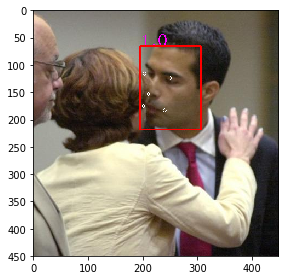

In [26]:
gt_imdb = []
#gt_imdb.append("35_Basketball_Basketball_35_515.jpg")
#imdb_ = dict()"
#imdb_['image'] = im_path
#imdb_['label'] = 5
path = "lala"
for item in os.listdir(path):
    gt_imdb.append(os.path.join(path,item))
test_data = TestLoader(gt_imdb)
all_boxes,landmarks = mtcnn_detector.detect_face(test_data)
count = 0
for imagepath in gt_imdb:
    print imagepath
    image = cv2.imread(imagepath)
    for bbox in all_boxes[count]:
        cv2.putText(image,str(np.round(bbox[4],2)),(int(bbox[0]),int(bbox[1])),cv2.FONT_HERSHEY_TRIPLEX,1,color=(255,0,255))
        cv2.rectangle(image, (int(bbox[0]),int(bbox[1])),(int(bbox[2]),int(bbox[3])),(0,0,255),2)
        
    for landmark in landmarks[count]:
        for i in range(len(landmark)/2):
            cv2.circle(image, (int(landmark[2*i]),int(int(landmark[2*i+1]))), 3, (255,255,255))
        
    count = count + 1
    cv2.imwrite("result_landmark/%d.png" %(count),image)
    image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    io.imshow(image)
    #cv2.imshow("lala",image)
    #cv2.waitKey(0)    

'''
for data in test_data:
    print type(data)
    for bbox in all_boxes[0]:
        print bbox
        print (int(bbox[0]),int(bbox[1]))
        cv2.rectangle(data, (int(bbox[0]),int(bbox[1])),(int(bbox[2]),int(bbox[3])),(0,0,255))
    #print data
    cv2.imshow("lala",data)
    cv2.waitKey(0)
'''